In [38]:
import pandas as pd
import numpy as np
import datetime
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, MeanShift
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importando os dados
df = pd.read_csv('/content/data.csv', encoding='latin-1')

In [3]:
# Visualizando os dados
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
# Visualizando as informações do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
# Limpando o dataframe
df = df.drop_duplicates()
df = df.dropna()

In [6]:
# Visualizando os dados, após a limpeza
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401604 non-null  object 
 1   StockCode    401604 non-null  object 
 2   Description  401604 non-null  object 
 3   Quantity     401604 non-null  int64  
 4   InvoiceDate  401604 non-null  object 
 5   UnitPrice    401604 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      401604 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.6+ MB


In [7]:
# Criando coluna que armazene o gasta
df['Sales'] = df['Quantity'] * df['UnitPrice']

In [8]:
# Visualizando as informações após crição da coluna
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401604 non-null  object 
 1   StockCode    401604 non-null  object 
 2   Description  401604 non-null  object 
 3   Quantity     401604 non-null  int64  
 4   InvoiceDate  401604 non-null  object 
 5   UnitPrice    401604 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      401604 non-null  object 
 8   Sales        401604 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 30.6+ MB


In [9]:
# Fazendo uma descrição dos dados
df.describe()

,Quantity,UnitPrice,CustomerID,Sales
count,401604.000000,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818,20.613638
std,250.283037,69.764035,1714.006089,430.352218
min,-80995.000000,0.000000,12346.000000,-168469.600000
25%,2.000000,1.250000,13939.000000,4.250000
50%,5.000000,1.950000,15145.000000,11.700000
75%,12.000000,3.750000,16784.000000,19.800000
max,80995.000000,38970.000000,18287.000000,168469.600000


In [10]:
# Procurando valores negativos na coluna "UnitPrice"
display(df.loc[df.UnitPrice <= 0])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,12/5/2010 14:02,0.0,12647.0,Germany,0.0
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,12/16/2010 14:36,0.0,16560.0,United Kingdom,0.0
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,12/21/2010 13:45,0.0,14911.0,EIRE,0.0
47068,540372,22090,PAPER BUNTING RETROSPOT,24,1/6/2011 16:41,0.0,13081.0,United Kingdom,0.0
47070,540372,22553,PLASTERS IN TIN SKULLS,24,1/6/2011 16:41,0.0,13081.0,United Kingdom,0.0
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,1/13/2011 15:10,0.0,15107.0,United Kingdom,0.0
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2/10/2011 13:08,0.0,17560.0,United Kingdom,0.0
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,3/23/2011 10:25,0.0,13239.0,United Kingdom,0.0
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,3/30/2011 12:45,0.0,13113.0,United Kingdom,0.0
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,4/4/2011 14:42,0.0,14410.0,United Kingdom,0.0


In [11]:
# Procurando valores negativos na coluna "Quantity"
display(df.loc[df.Quantity <= 0])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,-6.96
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom,-9.13
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom,-1.25


In [12]:
# Removendo os valores negativos
df = df.drop(df[df.Quantity <= 0].index)
df = df.drop(df[df.UnitPrice <= 0].index)

In [13]:
# Transformando os tipos dos dados
df['InvoiceNo'] = df['InvoiceNo'].astype('int64')
df['CustomerID'] = df['CustomerID'].astype('int64')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [14]:
# Agrupar por 'CustomerID' e aplicar diferentes operações de agregação
df_grouped = df.groupby(['CustomerID', 'StockCode', 'Description']).agg({'Sales': 'sum', 'InvoiceDate': 'count'}).reset_index()

In [15]:
# Visualizando os dados agrupados
df_grouped

,CustomerID,StockCode,Description,Sales,InvoiceDate
0,12346,23166,MEDIUM CERAMIC TOP STORAGE JAR,77183.60,1
1,12347,16008,SMALL FOLDING SCISSOR(POINTED EDGE),6.00,1
2,12347,17021,NAMASTE SWAGAT INCENSE,10.80,1
3,12347,20665,RED RETROSPOT PURSE,17.70,1
4,12347,20719,WOODLAND CHARLOTTE BAG,34.00,4
...,...,...,...,...,...
268393,18287,84920,PINK FLOWER FABRIC PONY,15.00,1
268394,18287,85039A,SET/4 RED MINI ROSE CANDLE IN BOWL,139.20,2
268395,18287,85039B,S/4 IVORY MINI ROSE CANDLE IN BOWL,176.40,3
268396,18287,85040A,S/4 PINK FLOWER CANDLES IN BOWL,79.20,2


In [16]:
# Visualizando os valores dos dados
df_grouped.describe()

,CustomerID,Sales,InvoiceDate
count,268398.000000,268398.000000,268398.000000
mean,15280.158351,33.112053,1.463096
std,1708.945311,401.615702,1.343386
min,12346.000000,0.001000,1.000000
25%,13870.000000,5.850000,1.000000
50%,15225.500000,14.850000,1.000000
75%,16775.000000,23.400000,1.000000
max,18287.000000,168469.600000,84.000000


In [17]:
# Visualizando os outliers
df_grouped[df_grouped.Sales >= 100]

,CustomerID,StockCode,Description,Sales,InvoiceDate
0,12346,23166,MEDIUM CERAMIC TOP STORAGE JAR,77183.60,1
16,12347,21731,RED TOADSTOOL LED NIGHT LIGHT,118.80,5
27,12347,22371,AIRLINE BAG VINTAGE TOKYO 78,132.40,4
30,12347,22375,AIRLINE BAG VINTAGE JET SET BROWN,119.00,6
34,12347,22423,REGENCY CAKESTAND 3 TIER,191.25,4
...,...,...,...,...,...
267943,18272,22993,SET OF 4 PANTRY JELLY MOULDS,105.00,6
267995,18273,79302M,"ART LIGHTS,FUNK MONKEY",204.00,3
268388,18287,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,106.32,2
268394,18287,85039A,SET/4 RED MINI ROSE CANDLE IN BOWL,139.20,2


In [18]:
# Visualizando os outliers
df_grouped[df_grouped.InvoiceDate >= 10]

,CustomerID,StockCode,Description,Sales,InvoiceDate
1076,12362,POST,POSTAGE,489.00,10
2448,12395,POST,POSTAGE,336.00,12
5222,12437,POST,POSTAGE,504.00,15
6584,12471,22423,REGENCY CAKESTAND 3 TIER,4730.40,11
6604,12471,22728,ALARM CLOCK BAKELIKE PINK,615.00,14
...,...,...,...,...,...
268159,18283,22383,LUNCH BAG SUKI DESIGN,29.70,11
268160,18283,22384,LUNCH BAG PINK POLKADOT,29.70,11
268162,18283,22386,JUMBO BAG PINK POLKADOT,39.13,12
268259,18283,23206,LUNCH BAG APPLE DESIGN,34.65,11


In [19]:
# Removendo outliers
df_grouped = df_grouped.drop(df_grouped[df_grouped.InvoiceDate >= 10].index)
df_grouped = df_grouped.drop(df_grouped[df_grouped.Sales >= 100].index)

In [20]:
# Visualizando os valores dos dados, após a remoção
df_grouped.describe()

,CustomerID,Sales,InvoiceDate
count,255699.000000,255699.000000,255699.000000
mean,15292.454988,17.154149,1.329411
std,1704.224199,16.980714,0.821802
min,12347.000000,0.001000,1.000000
25%,13883.000000,5.100000,1.000000
50%,15252.000000,13.200000,1.000000
75%,16780.000000,20.160000,1.000000
max,18287.000000,99.900000,9.000000


In [21]:
# Visualizando o dataframe final
df_grouped

,CustomerID,StockCode,Description,Sales,InvoiceDate
1,12347,16008,SMALL FOLDING SCISSOR(POINTED EDGE),6.00,1
2,12347,17021,NAMASTE SWAGAT INCENSE,10.80,1
3,12347,20665,RED RETROSPOT PURSE,17.70,1
4,12347,20719,WOODLAND CHARLOTTE BAG,34.00,4
5,12347,20780,BLACK EAR MUFF HEADPHONES,55.80,1
...,...,...,...,...,...
268391,18287,84507C,BLUE CIRCLES DESIGN MONKEY DOLL,15.30,1
268392,18287,84584,PINK GINGHAM CAT WITH SCARF,15.30,1
268393,18287,84920,PINK FLOWER FABRIC PONY,15.00,1
268396,18287,85040A,S/4 PINK FLOWER CANDLES IN BOWL,79.20,2


In [22]:
# Criando uma instância do LabelEncoder
encoder = LabelEncoder()

# transformando as categorias da coluna 'StockCode' em números
df_grouped['StockCode'] = encoder.fit_transform(df_grouped['StockCode'])

In [23]:
# Fazendo o pre processamento dos dados(padronização/normalização)
scaler = StandardScaler()
df_grouped[['Sales', 'InvoiceDate']] = scaler.fit_transform(df_grouped[['Sales', 'InvoiceDate']])

scaler = MinMaxScaler()
df_grouped[['Sales', 'InvoiceDate']] = scaler.fit_transform(df_grouped[['Sales', 'InvoiceDate']])

In [24]:
# Visualizando os dados
df_grouped.head()

,CustomerID,StockCode,Description,Sales,InvoiceDate
1,12347,25,SMALL FOLDING SCISSOR(POINTED EDGE),0.060051,0.000
2,12347,87,NAMASTE SWAGAT INCENSE,0.108099,0.000
3,12347,130,RED RETROSPOT PURSE,0.177169,0.000
4,12347,167,WOODLAND CHARLOTTE BAG,0.340334,0.375
5,12347,206,BLACK EAR MUFF HEADPHONES,0.558554,0.000


In [25]:
# Retirando uma amostra dos dados para a modelagem
amostra1, amostra2 = train_test_split(df_grouped, train_size=0.1, random_state=123)

In [26]:
# Visualizando os dados
amostra1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25569 entries, 89856 to 261780
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CustomerID   25569 non-null  int64  
 1   StockCode    25569 non-null  int64  
 2   Description  25569 non-null  object 
 3   Sales        25569 non-null  float64
 4   InvoiceDate  25569 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.2+ MB


In [27]:
# Selecionando as features para clustering
features = ['Sales', 'InvoiceDate', 'StockCode']

# Criando um novo DataFrame apenas com as features
X = amostra1[features]

# Escolhendo o número de clusters
k = 3

In [41]:
# Treinando o modelo K-Means
kmeans = KMeans(n_clusters=k, random_state=42)
labels_kmeans = kmeans.fit_predict(X)
amostra1['Cluster_kmeans'] = labels_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Treinando o modelo dbscan
dbscan = DBSCAN(eps=0.5, min_samples=k)
labels_dbscan = dbscan.fit_predict(X)
amostra1['Cluster_dbscan'] = labels_dbscan

In [ ]:
# Treinando o modelo Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=k)
labels_hierarchical = hierarchical.fit_predict(X)
amostra1['hierarchical_labels'] = labels_hierarchical

In [ ]:
# Treinando o modelo Mean Shift
meanshift = MeanShift()
labels_meanshift = meanshift.fit_predict(X)
amostra1['meanshift_labels'] = labels_meanshift

In [42]:
# Métricas kmeans
score_silhouette = silhouette_score(X, labels_kmeans)
db_index = davies_bouldin_score(X, labels_kmeans)
ch_index = calinski_harabasz_score(X, labels_kmeans)
print(f'''Métricas kmeans:
score_silhouette: {score_silhouette}
db_index: {db_index}
ch_index: {ch_index}
''')

# Métricas dbscan
score_silhouette = silhouette_score(X, labels_dbscan)
db_index = davies_bouldin_score(X, labels_dbscan)
ch_index = calinski_harabasz_score(X, labels_dbscan)
print(f'''Métricas dbscan:
score_silhouette: {score_silhouette}
db_index: {db_index}
ch_index: {ch_index}
''')

# Métricas hierarchical
score_silhouette = silhouette_score(X, labels_hierarchical)
db_index = davies_bouldin_score(X, labels_hierarchical)
ch_index = calinski_harabasz_score(X, labels_hierarchical)
print(f'''Métricas hierarchical:
score_silhouette: {score_silhouette}
db_index: {db_index}
ch_index: {ch_index}
''')

# Métricas meanshift
score_silhouette = silhouette_score(X, labels_meanshift)
db_index = davies_bouldin_score(X, labels_meanshift)
ch_index = calinski_harabasz_score(X, labels_meanshift)
print(f'''Métricas meanshift:
score_silhouette: {score_silhouette}
db_index: {db_index}
ch_index: {ch_index}
''')

Métricas kmeans:
score_silhouette: 0.570778782620809
db_index: 0.48205195656061256
ch_index: 220168.18293394742

Métricas dbscan:
score_silhouette: 0.26385591387157875
db_index: 6.754112417552311
ch_index: 39.81893616157707

Métricas hierarchical:
score_silhouette: 0.5371761607811121
db_index: 0.5101823552951704
ch_index: 196812.72503712372

Métricas meanshift:
score_silhouette: 0.5180740054796398
db_index: 0.5160794019307885
ch_index: 27532.137640238077



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

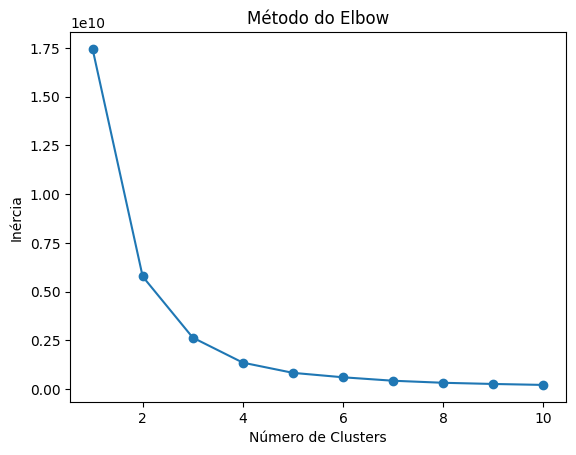

In [43]:
# Criando método do Elbow
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotando a curva de cotovelo
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método do Elbow')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

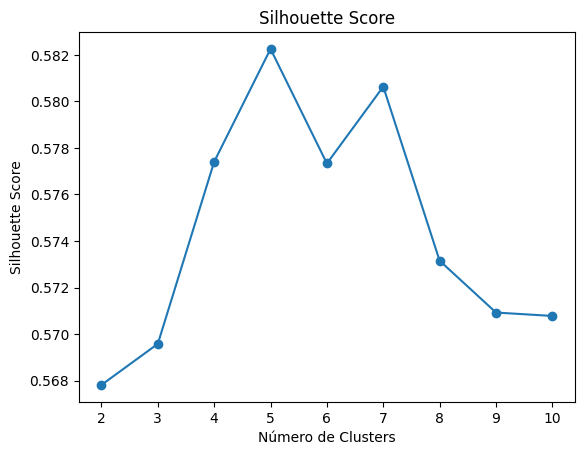

In [44]:
# Criando método Silhouette Score
sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, kmeans_labels)
    sil_scores.append(silhouette_avg)

# Plotando a curva do Silhouette Score
plt.plot(range(2, 11), sil_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [45]:
# Visulizando os dados com as colunas de clustering
amostra1

,CustomerID,StockCode,Description,Sales,InvoiceDate,Cluster_kmeans,Cluster_dbscan,hierarchical_labels,meanshift_labels
89856,14367,1917,ZINC HEART T-LIGHT HOLDER,0.200192,0.000,1,-1,9,0
141776,15427,333,BOOM BOX SPEAKER GIRLS,0.059550,0.000,0,-1,1,0
104153,14606,3312,ASSORTED CHEESE FRIDGE MAGNETS,0.039029,0.000,6,-1,6,1
194243,16655,1374,CHILDS GARDEN RAKE PINK,0.021011,0.000,9,-1,3,0
15619,12637,1517,RED BABY BUNTING,0.295288,0.000,4,0,4,0
...,...,...,...,...,...,...,...,...,...
202347,16794,1515,RECIPE BOX RETROSPOT,0.147639,0.375,4,629,4,0
19064,12707,1381,CHILDRENS GARDEN GLOVES BLUE,0.125116,0.000,9,-1,3,0
30034,12957,1681,ROUND CAKE TIN VINTAGE GREEN,0.159151,0.000,1,764,8,0
16885,12670,1480,SPACEBOY LUNCH BOX,0.468463,0.125,4,880,4,0


In [47]:
# Criando uma copia dos dados para modelo ideal
amostra_ideal = amostra1.copy()

# Removendo colunas dos modelos não usados
amostra_ideal.drop('Cluster_kmeans', axis=1, inplace=True)
amostra_ideal.drop('Cluster_dbscan', axis=1, inplace=True)
amostra_ideal.drop('hierarchical_labels', axis=1, inplace=True)
amostra_ideal.drop('meanshift_labels', axis=1, inplace=True)

In [48]:
amostra_ideal

,CustomerID,StockCode,Description,Sales,InvoiceDate
89856,14367,1917,ZINC HEART T-LIGHT HOLDER,0.200192,0.000
141776,15427,333,BOOM BOX SPEAKER GIRLS,0.059550,0.000
104153,14606,3312,ASSORTED CHEESE FRIDGE MAGNETS,0.039029,0.000
194243,16655,1374,CHILDS GARDEN RAKE PINK,0.021011,0.000
15619,12637,1517,RED BABY BUNTING,0.295288,0.000
...,...,...,...,...,...
202347,16794,1515,RECIPE BOX RETROSPOT,0.147639,0.375
19064,12707,1381,CHILDRENS GARDEN GLOVES BLUE,0.125116,0.000
30034,12957,1681,ROUND CAKE TIN VINTAGE GREEN,0.159151,0.000
16885,12670,1480,SPACEBOY LUNCH BOX,0.468463,0.125


In [50]:
# Treinando o modelo K-Means com número ideal de K
kmeans = KMeans(n_clusters=5, random_state=42)
labels_kmeans = kmeans.fit_predict(X)
amostra_ideal['Cluster_kmeans'] = labels_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


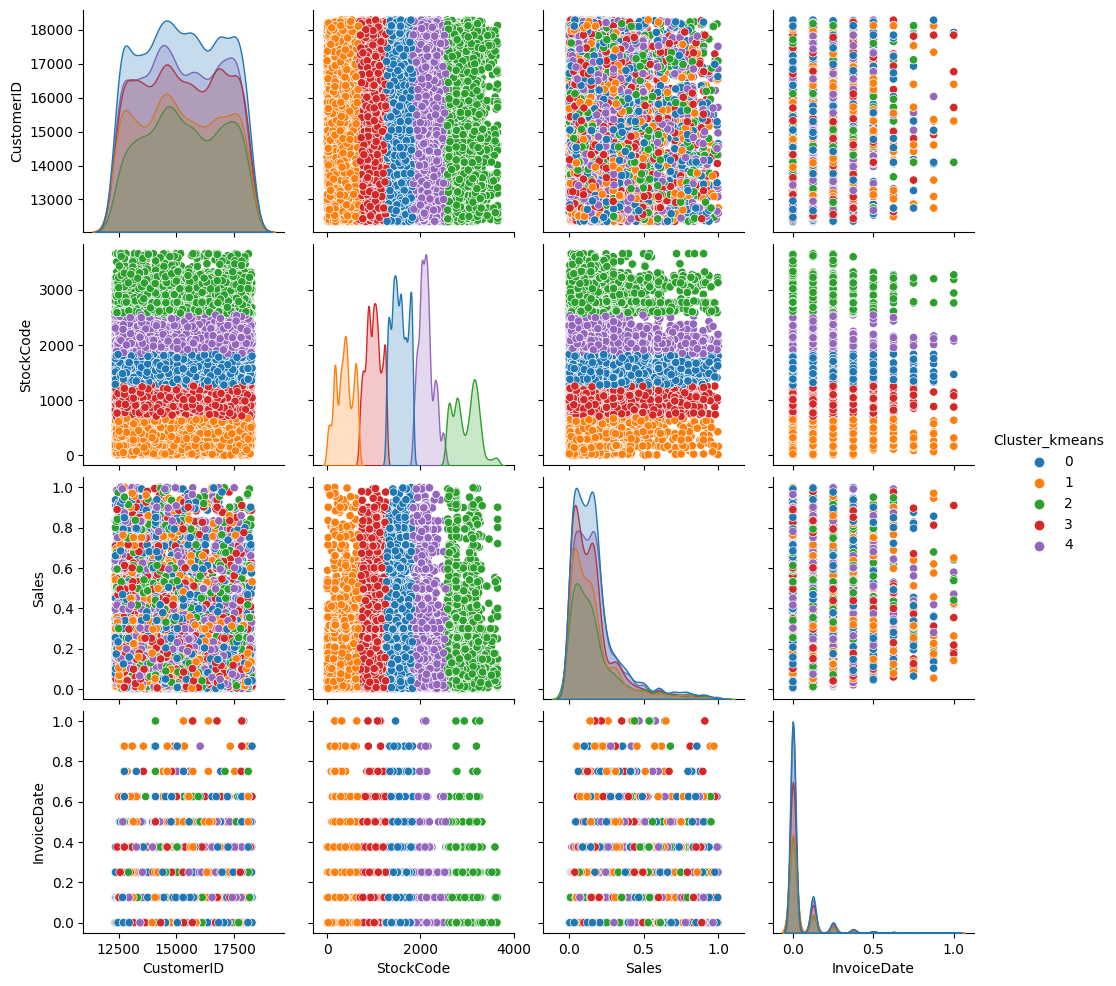

In [51]:
# Plotando graficos com clusters
sns.pairplot(amostra_ideal, hue='Cluster_kmeans', palette='tab10')
plt.show()